# pandas visualization practice

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly
import plotly.express as px
%matplotlib inline 
plt.style.use('default')

In [46]:
churn = pd.read_csv('data/churn.csv', index_col=False)
churn = churn.drop('RowNumber', axis=1)
display(churn.info())
display(churn.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


None

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [47]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)
churn.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor


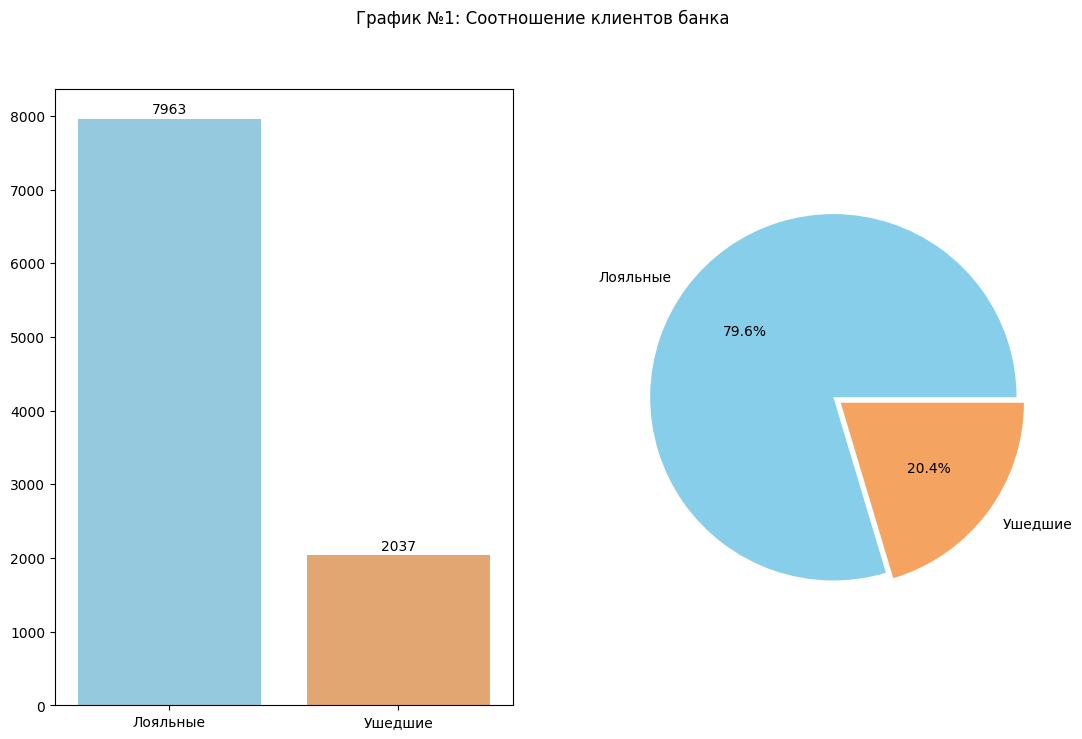

In [49]:
grouped_exited = churn['Exited'].value_counts()

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
fig.suptitle('График №1: Соотношение клиентов банка')

bar = sns.barplot(
    x=grouped_exited.index,
    y=grouped_exited.values,
    hue=grouped_exited.index,
    palette=['#87CEEB', '#F4A460'],
    legend=False,
    ax=axis[0]
);
bar.set_xticks([0, 1]);
bar.set_xticklabels(['Лояльные', 'Ушедшие']);
bar.set_xlabel(None);
for i, val in enumerate(grouped_exited.values):
    bar.text(x=i, y=val+25, s=val, ha='center', va='bottom');

pie = plt.pie(
    x=grouped_exited.values,
    labels=['Лояльные', 'Ушедшие'],
    autopct='%1.1f%%',
    explode=[0, 0.05],
    colors=['#87CEEB', '#F4A460']
);


### График №1
Почти 80% клиентов остаются лояльны к банку. Доля ушедших клиентов 20% или 1/5 от всех клиентов.

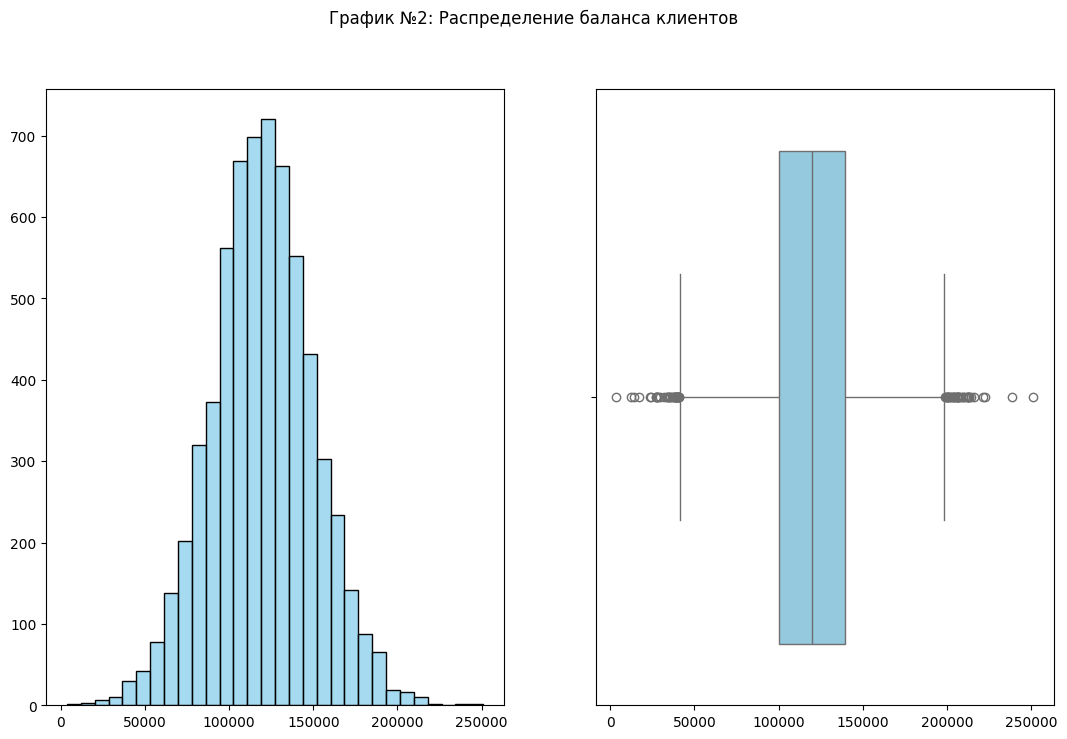

In [50]:
grouped_balance = churn[churn['Balance'] >= 2500]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
fig.suptitle('График №2: Распределение баланса клиентов')

bar = sns.histplot(
    data=grouped_balance,
    x='Balance',
    bins=30,
    color='#87CEEB',
    ax=axes[0]
);
bar.set_xlabel(None)
bar.set_ylabel(None)

box = sns.boxplot(
    data=grouped_balance,
    x='Balance',
    color='#87CEEB',
    ax=axes[1]
);
box.set_xlabel(None);

### График №2
* Разброс «нормальных» значений от ≈ 100 тыс. до ≈ 140 тыс.
* Встречаются значения, близкие к 2,5 тыс. 250 тыс.
* Среднее значение ≈ 125 тыс.
* Модальные значения: мод-1 ≈ 105 тыс., мод-2 ≈ 120 тыс.
#### Вывод: 
* Гистограмма (график слева) имеет симметричный вид с пиковыми значениями в центре. Это означает, что основная масса клиентов имеет на счету сумму в диапазоне от 100-150 тыс. Это также подтверждается компактностью «ящика» относительно его усов (на графике справа).
* Размах усов свидетельствует о том, что диапазон «обычных» значений от 35–100 тыс. и 150-200 тыс. рублей, однако таких значений не так много, что подтверждается гистограммой слева.
* Также существуют значения-выбросы, которые существенно отличаются от «нормальных»: это балансы менее 35 тыс. и более 200 тыс. рублей. Однако таких случаев совсем немного.
### Итог:
* Большинство клиентов банка имеют средние балансы. Выбросы в сторону низких и высоких балансов незначительны.
* График позволяет банку ориентироваться на потребности клиентов с средними балансами. Так же учитываться специфику сотрудничества с клиентами с низкими и высокими значениями балнсов.


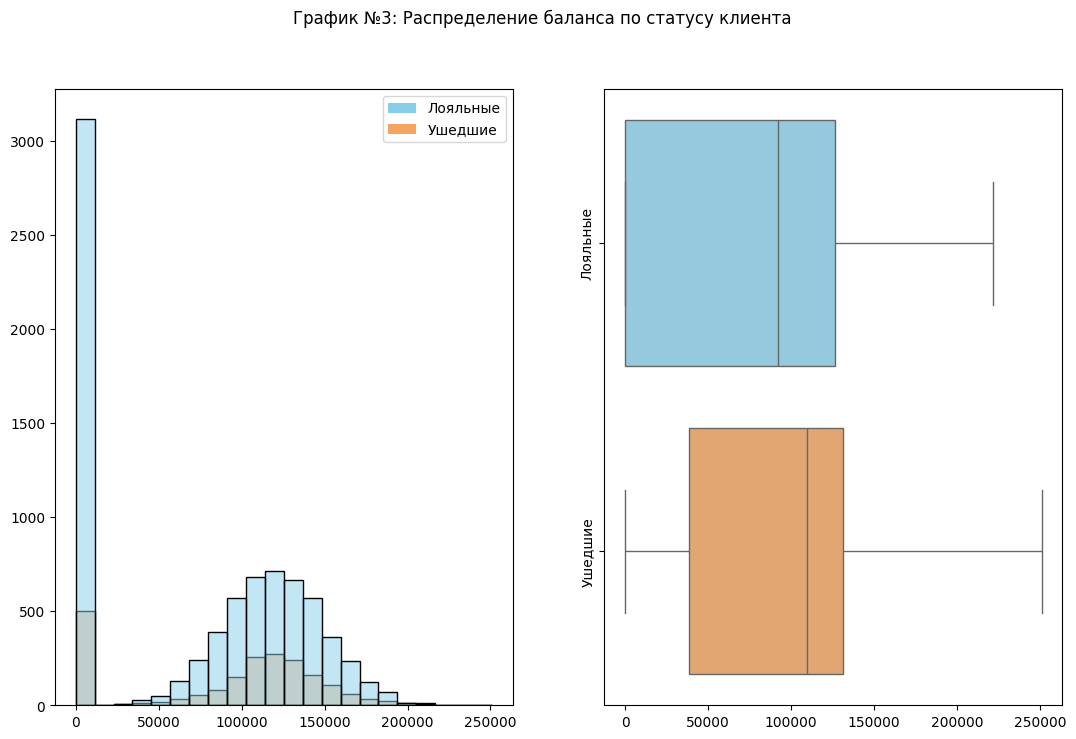

In [51]:
churn['Exited'] = churn['Exited'].astype('category')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
fig.suptitle('График №3: Распределение баланса по статусу клиента')

bar = sns.histplot(
    data=churn,
    x='Balance',
    hue='Exited',
    bins='auto',
    palette=['#87CEEB', '#F4A460'],
    ax=axes[0],
    legend=True
);
bar.set_xlabel(None)
bar.set_ylabel(None)
legend_handles = [Patch(facecolor='#87CEEB', label='Лояльные'), Patch(facecolor='#F4A460', label='Ушедшие')]
bar.legend(handles=legend_handles, title=None)

box = sns.boxplot(
    data=churn,
    x='Balance',
    y='Exited',
    hue='Exited',
    palette=['#87CEEB', '#F4A460'],
    ax=axes[1],
    legend=False
);
box.set_xlabel(None)
box.set_ylabel(None)
box.set_yticks([0, 1])
box.set_yticklabels(['Лояльные', 'Ушедшие'], rotation=90, va='center');

### График №3
#### Лояльные клиенты:
* Разброс "нормальных" значений: ≈ 0-125 тыс.
* Встречаются значения: ≈ 125-220 тыс.
* Среднее значение: ≈ 80 тыс.
* Модальное значение: ≈ 0-5 тыс.
* Вывод: Гистограмма (график слева) имеет асимметричный вид с пиками в левой части. Это указывает на то, что основная доля лояльных клиентов держит на счету сумму в диапазоне ≈ 0-125 тыс. Широкий ящик (график справа) сведетельствует о значительном разбросе сумм. Небольшой размах усов относительно тела ящика говорит о том, что суммы в диапазоне 125-220 тыс встречабтся намного реже.

#### Ушедшие клиенты:
* Разброс "нормальных" значений: ≈ 40-130 тыс.
* Встречаются значения: ≈ 0-40 тыс и ≈130-250 тыс.
* Среднее значение: ≈ 110 тыс.
* Модальное значение: ≈ 0-5 тыс.
* Вывод: Гистограмма (график слева) имеет асимметричный вид с пиками в левой части. Что говорит о том, что немалая часть клиентов имела на счету минимальные суммы ≈ 40 тыс. и менее. Компактный ящик (график справа) указывает на то, что основная масса сумм не сильно отличаются друг от друга. Основная масса клиентов имела баланс в диапазоне 40-130 тыс. Малый размех левого уса подтверждает, что весомая часть клиентов имела на счету минимальные суммы любо 0. Широкий правый ус показывает, что заметное количество клиентов имели раззообразные балансы в пределах 130-250 тыс.

#### Итог:
* Ушедшие клиенты в среднем имели больший баланс чем лояльные. У не лояльных клиентов меньше вариативность сумм, за исключением пиковых значений.
* Банк потерял клиентов с разными остаткми на балансе от самых малых до максимальных. Это может сведетельстовать о том, что условия обслуживания одинаково не выгодны для всех счетов.
* "Зона риска":
* * среди ушедших клиентов около 500 человек имели минимальный баланс. ≈ 25% от 2037 ушедших клиентов.
* * среди лояльных клиентов более 3000 человек держат на счету минимальные суммы. ≈ 40% от 7963 лояльных клиентов.
* Данные графиков показывают необходимость пересмотра условий обслуживаниях всех категорий клиентов. Особое внимание стоит обратить на условия для клиентов в "зоне риска".

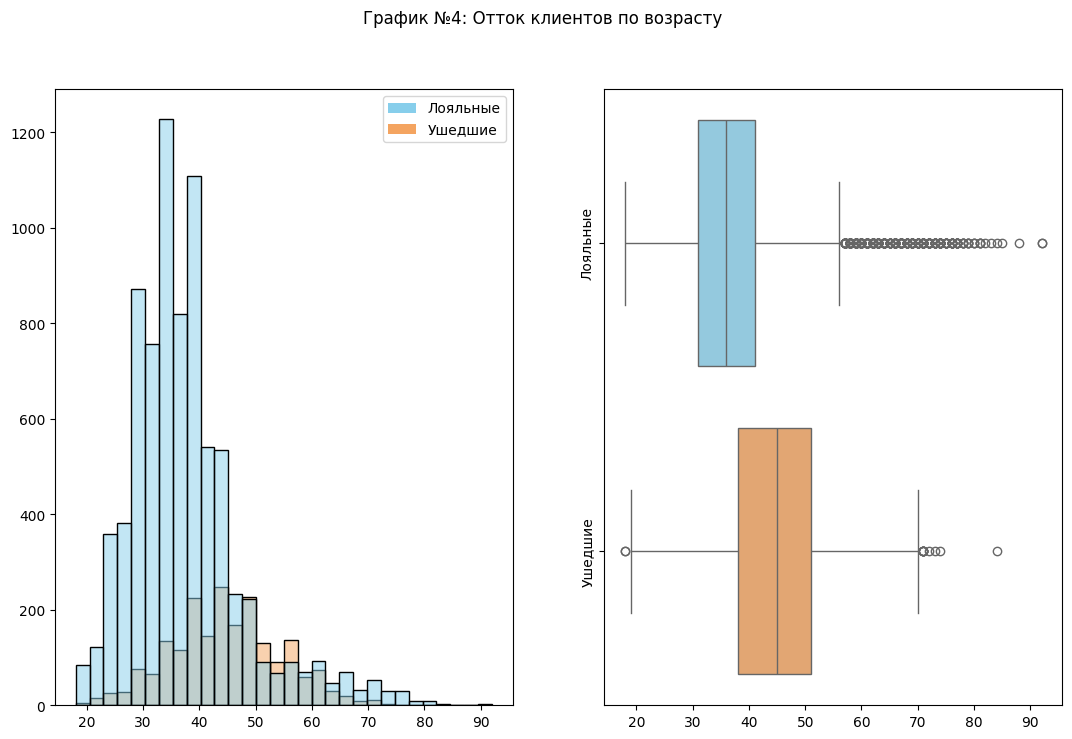

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
fig.suptitle('График №4: Отток клиентов по возрасту')

bar = sns.histplot(
    data=churn,
    x='Age',
    hue='Exited',
    bins=30,
    palette=['#87CEEB', '#F4A460'],
    ax=axes[0]
);
bar.set_xlabel(None)
bar.set_ylabel(None)
legend_handles = [Patch(facecolor='#87CEEB', label='Лояльные'), Patch(facecolor='#F4A460', label='Ушедшие')]
bar.legend(handles=legend_handles, title=None)

box = sns.boxplot(
    data=churn,
    x='Age',
    y='Exited',
    hue='Exited',
    palette=['#87CEEB', '#F4A460'],
    ax=axes[1],
    legend=False
);
box.set_xlabel(None)
box.set_ylabel(None)
box.set_yticks([0, 1])
box.set_yticklabels(['Лояльные', 'Ушедшие'], rotation=90, va='center');

### График №4
#### Лояльных клиенты:
* Разброс "нормальных" значений: ≈ 30-42 года.
* Встречаются значения: ≈ 18-30 и 42-57 лет.
* Среднее значение: ≈ 35 лет.
* Модальное значение: Мод-1 ≈ 35 лет, Мод-2 ≈ 40 лет .
* Вывод: Гистограмма (график слева) имеет асимметричный вид с пиком в левой части. Это говорит о том, что преобладают молодые клиенты и малая часть средних лет. Небольшой ящик (график справа) показывает однородность данных. Усы равномерно распределены в обе стороны, это свитетельствует о том, что лояльные клиенты наблюдаются во всех возрастных группах, однако пожилых клиентов гараздо меньше. Выбросы справа от усов имеют широкий диапазон значений ≈ 60-90 лет, но таких значений совсем мало.
#### Нелояльные клиенты:
* Разброс "нормальных" значений: ≈ 38-52 года.
* Встречаются значения: ≈ 18-38 и 52-70 лет.
* Среднее значение: ≈ 45 лет.
* Модальное значение: ≈ 45 лет.
* Вывод: Гистограмма (график слева) имеет асимметричный вид с пиком в левой части. Что сведетельствует о том, что большинство ушедших клиентов молодые люди, или люди средних лет. Так же это подтверждаетcя компактным ящиком (график справа) относительно своих усов, значения "ядра" данных не отличаются вариативностью. Усы ящика имеют одинаковый размах в обе стороны, что сведетельствует о том, что нелояльные клиенты есть во всех возрастных группах, однакои их гараздо меньше. Наблюдаются "выбросы" данных по обе стороны, подобных значений совсем мало.
#### Итог:
* Основная доля ушедших клиентов в среднем на 10 лет старше лояльных, за исключением выбросовых значений лояльных клиентов. 
* Наблюдается тенденция "Зона риска", в основном клиенты уходят в возрасте 35-55 лет, что подтверждается преобладанием более молодой возростной группы среди лояльных клиентов.
* 35-55 лет группа граждан на пике своей трудовой деятельности и доходов. Такие граждане больше нацелены на накопление и защиту капитала. Возможно, банку стоит пересмотреть условия накопления и обслуживания своих лояльных клиентов, которые в ближайщие 10 лет перейдут в эту категорию граждан. 
 

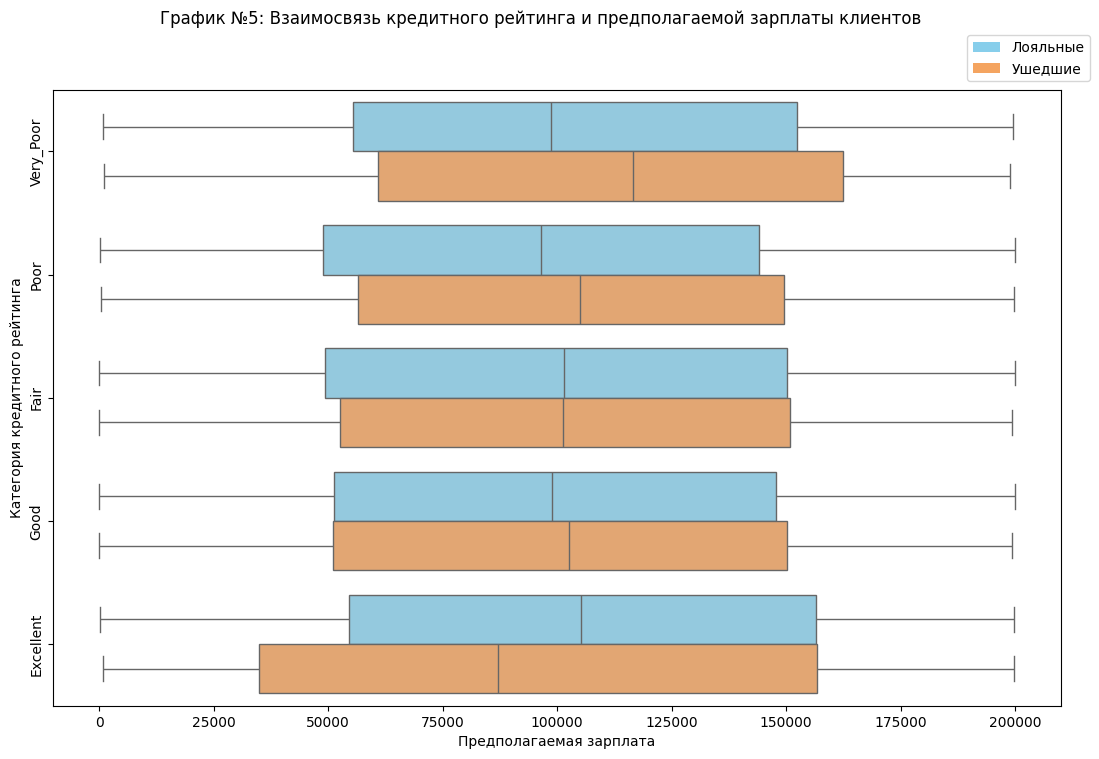

In [53]:
fig = plt.figure(figsize=(13, 8))
fig.suptitle('График №5: Взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиентов')

box = sns.boxplot(
    data=churn,
    x='EstimatedSalary',
    y='CreditScoreCat',
    hue='Exited',
    palette=['#87CEEB','#F4A460'],
    order=["Very_Poor", "Poor", "Fair", "Good", "Excellent"],
);
legend_handles = [Patch(facecolor='#87CEEB', label='Лояльные'), Patch(facecolor='#F4A460', label='Ушедшие')]
box.legend(handles=legend_handles, bbox_to_anchor=(0.9, 1.1), loc='upper left')
box.set_ylabel('Категория кредитного рейтинга')
box.set_xlabel('Предполагаемая зарплата');
box.set_yticks(["Very_Poor", "Poor", "Fair", "Good", "Excellent"])
box.set_yticklabels(labels=["Very_Poor", "Poor", "Fair", "Good", "Excellent"], rotation=90, va='center');

### График №5
#### Вывод: 
* Диапазон основных значений зарплат, в независимости от кредитного рейтинга, для любого статуса клиента имеет похожий вид. Ящики заметно широкие отностиельно своих усов, что говорит о широком диапазоне значений.
* Средние значения зарплат для обоих групп клиентов примерно равны. Наблюдается дизбаланс для каегорий кредитного рейтинга "Excellent" и "Very_Poor".
* * "Excellent" у лояльных клиентов среднее значение зарплат ≈ 110 тыс выше чем у ушедших ≈ 82 тыс. У не лояльных клиентов диапазон основных значений имеет перекос к нижней границе зарплат.
* * "Very_Poor" у не лояльных клиентов среднее значение зарплат ≈ 120 тыс выше чем у лояльных ≈ 90 тыс. 
* Размах усов для всех категорий кредитного рейтинга и всех клиентов практически равны.
#### Итог: 
Никакой связи между кредитным рейтингом и предполагаемой зарплаты не наблюдается. Тезисы "Чем ниже зарплата, тем хуже кредитный рейтинг" и "Чем лучше кредитный рейтинг, тем выше зарплата" и наоборот не подтверждаются. 
* Отсюда следует предположение, что кредитные условия одинаково невыгодны для людей с любой зарплатой и с любым кредитным рейтингом. Возможно, банку стоит пересмотреть условия кредитов для своих клиентов.

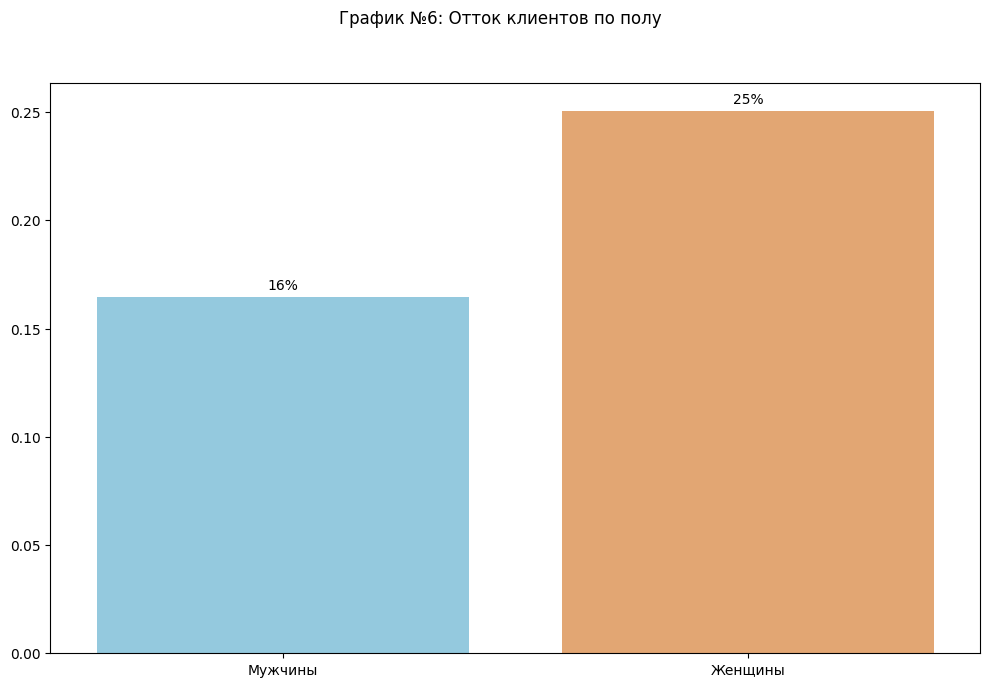

In [54]:
churn['Exited'] = churn['Exited'].astype('int')
grouped_gender = churn.groupby('Gender', as_index=False)['Exited'].mean()
grouped_gender = grouped_gender.sort_index(ascending=False)

fig = plt.figure(figsize=(12, 7.4))
fig.suptitle('График №6: Отток клиентов по полу')

bar = sns.barplot(
    data=grouped_gender,
    x='Gender',
    y='Exited',
    hue='Gender',
    palette=['#87CEEB' ,'#F4A460'],
);
bar.set_xticks([0, 1]);
bar.set_xticklabels(['Мужчины', 'Женщины']);
bar.set_xlabel(None);
bar.set_ylabel(None);
for i, val in enumerate(grouped_gender['Exited']):
    bar.text(x=i, y=val+0.002, s=f'{int(val*100)}%', ha='center', va='bottom');

### График №6
16% от общего числа мужчин не лояльны к банку, соответственно 25% женщин от всех женищин не лояльны к банку. Женщины уходят чаще.


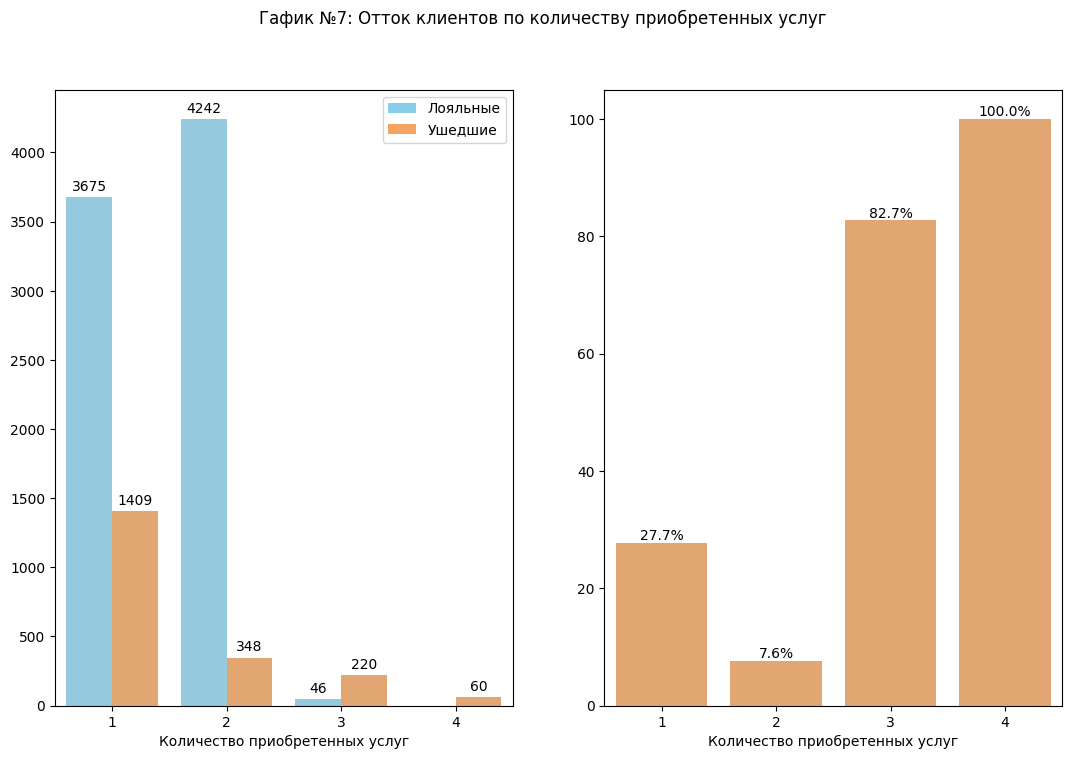

In [55]:
grouped_product = churn.groupby('NumOfProducts', as_index=False)['Exited'].value_counts()
piv_prod = grouped_product.pivot_table(
    values='count',
    index='NumOfProducts',
    columns='Exited',
    fill_value=0
)
piv_prod['percent'] = round(piv_prod[1] / (piv_prod[0] + piv_prod[1])*100, 1)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
fig.suptitle('Гафик №7: Отток клиентов по количеству приобретенных услуг')

bar = sns.barplot(
    data=grouped_product,
    x='NumOfProducts',
    y='count',
    hue='Exited',
    palette=['#87CEEB','#F4A460'],
    ax=axis[0]
);
bar.set_xlabel('Количество приобретенных услуг');
bar.set_ylabel(None);
for patch in bar.patches:
    if patch.get_height() != 0:
        bar.text(x=patch.get_x() + patch.get_width()/2, y=patch.get_height()+25, 
                 s=f'{int(patch.get_height())}', ha='center', va='bottom')
legend_handles = [Patch(facecolor='#87CEEB', label='Лояльные'), Patch(facecolor='#F4A460', label='Ушедшие')]
bar.legend(handles=legend_handles, title=None)

bar1 = sns.barplot(
    data=piv_prod,
    x='NumOfProducts',
    y='percent',
    color='#F4A460',
    ax=axis[1]
);
bar1.set_xlabel('Количество приобретенных услуг');
bar1.set_ylabel(None);       
for i, val in enumerate(piv_prod['percent']):
    bar1.text(x=i, y=val+0.002, s=f'{round(val,2)}%', ha='center', va='bottom');


### График №7
#### Вывод:
* Большинство лояльных клиентов использвуют 1 или 2 услуги банка.
* Среди клиентов использующих 3 или 4 услуги банка лояльных меньшенство.
* Минимальный отток клиентов использует 2 услуги, соответственно это самая лоляльная группа клиентов.
#### Итог:
Графики показываеют прямую зависимоть между количеством приобретенных услуг банка и вероятностью оттока клиентов. Чем больше услуг, тем выше вероятность оттока. Возможно, банку стоит сократить количество предлагаемых услуг. Так же повысить качество и целесообразность услуг для клиентов.

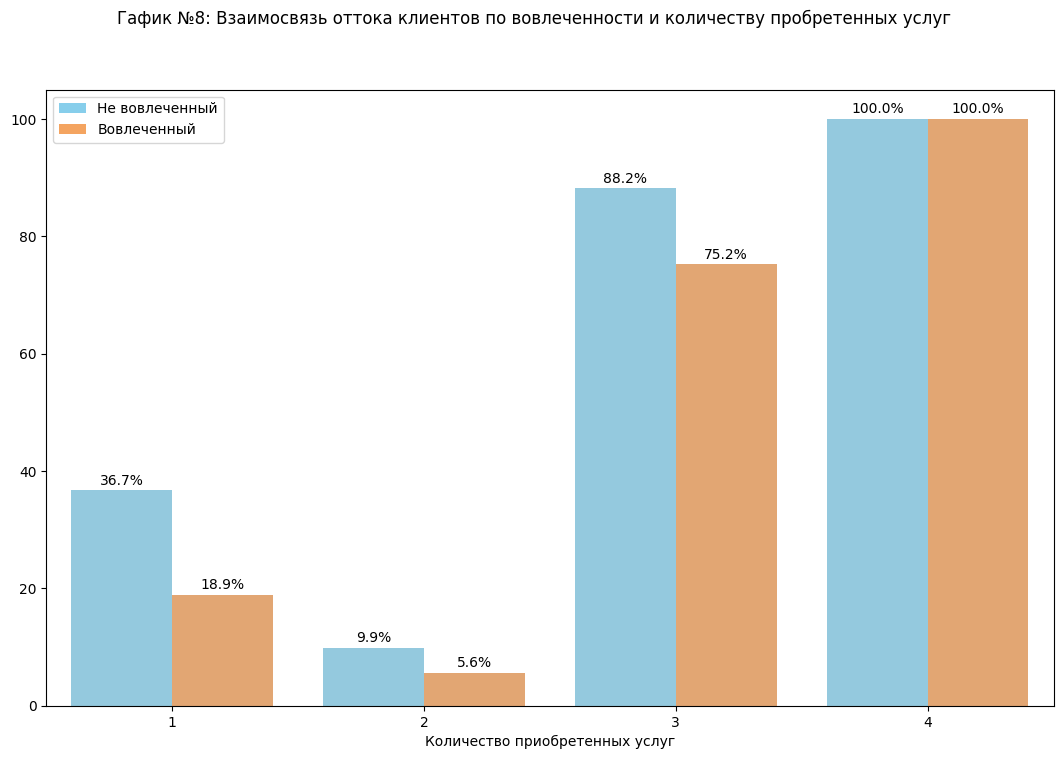

In [56]:
grouped_prod_active  = churn.groupby(['IsActiveMember', 'NumOfProducts'])['Exited'].mean().reset_index()
grouped_prod_active['percent_exited'] = grouped_prod_active['Exited'].apply(lambda x: round(x*100, 1))

fig = plt.figure(figsize=(13, 8))
fig.suptitle('Гафик №8: Взаимосвязь оттока клиентов по вовлеченности и количеству пробретенных услуг')

bar = sns.barplot(
    data=grouped_prod_active,
    x='NumOfProducts',
    y='percent_exited',
    hue='IsActiveMember',
    palette=['#87CEEB' ,'#F4A460'],
)
handles = [Patch(facecolor='#87CEEB', label='Не вовлеченный'), Patch(facecolor='#F4A460', label='Вовлеченный')]
bar.legend(handles=handles);
for patch in bar.patches:
    if patch.get_height() != 0:
        bar.text(x=patch.get_x() + patch.get_width()/2, y=patch.get_height()+0.5, 
                 s=f'{patch.get_height()}%', ha='center', va='bottom')
bar.set_ylabel(None)
bar.set_xlabel('Количество приобретенных услуг');


### График №8 
#### Вывод:
* Вовлеченные клиенты использующих 1 услугу банка уходят на 20% реже.
* Вовлеченные клиенты использующих 2 услуги банка уходят в 2 раза реже.
* Статус вовлеченности не влияет на отток клиентов использующих 3 или 4 услуги. Клиенты уходят одинаково часто.
#### Итог:
* Статус влияет на отток клиентов с 1 или 2 услугами. Большее количество услуг негативно влияет на лояльность клиентов, вне зависимости от статуса. Возможно, банку стоит предлагать услуги только активным клиентам банка. Или пересмотреть систему мотивации клиентов, чтоб являться активным клиентом было выгодно.

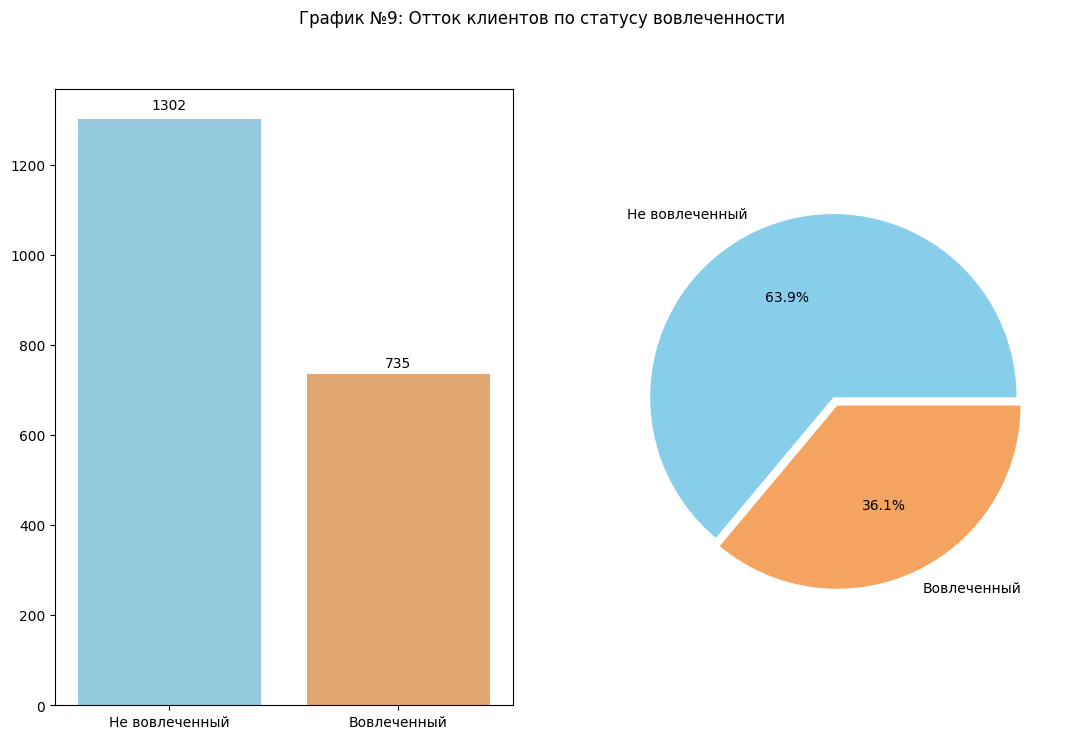

In [57]:
grouped_active = churn[churn['Exited'] == 1].groupby('IsActiveMember')['Exited'].value_counts()

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
fig.suptitle('График №9: Отток клиентов по статусу вовлеченности')

bar = sns.barplot(
    x=grouped_active.index.get_level_values(0),
    y=grouped_active.values,
    hue=grouped_active.index.get_level_values(0),
    palette=['#87CEEB' ,'#F4A460'],
    legend=False,
    ax=axis[0]
)
bar.set_xlabel(None)
bar.set_xticks([0, 1])
bar.set_xticklabels(['Не вовлеченный', 'Вовлеченный'])
for i, val in enumerate(grouped_active.values):
    bar.text(x=i, y=val/0.99, s=val, ha='center', va='bottom')
pie = plt.pie(
    x=grouped_active.values,
    labels=['Не вовлеченный', 'Вовлеченный'],
    autopct='%1.1f%%',
    explode=[0, 0.05],
    colors=['#87CEEB', '#F4A460']
)

### График №9
#### Вывод:
Среди ушедших клиентов не вовлеченных практически в 2 раза больше.
#### Итог:
График демонстрирует явную зависимость активности на отток клиентов. Не вовлеченные клиенты уходят в 2 раза чаще. Возможно, банку стоит пересмотреть систему мотивации своих клиентов.

In [58]:
grouped_country = churn[churn['Exited'] == 1]['Geography'].value_counts().reset_index()

fig = px.choropleth(
    data_frame=grouped_country,
    locations='Geography',
    locationmode='country names',
    color='count',
    title='График №10: Отток клиентов по странам',
    width=800, 
    height=500,
    color_continuous_scale='tempo'
);
fig.show();

C:\Users\Кипарис\AppData\Local\Temp\ipykernel_14712\2866764892.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### График №10
#### Итог:
График демонстрирует наибольший отток клиентов из Германии 814 и Франции 810 клиентов. Испанские клиенты уходят в 2 раза реже 413 человек.
Возможно, это связанно с высокой конкуренцией банков в Германии и Франции, чем в Испании. Клентам проще найти более выгодные условия.

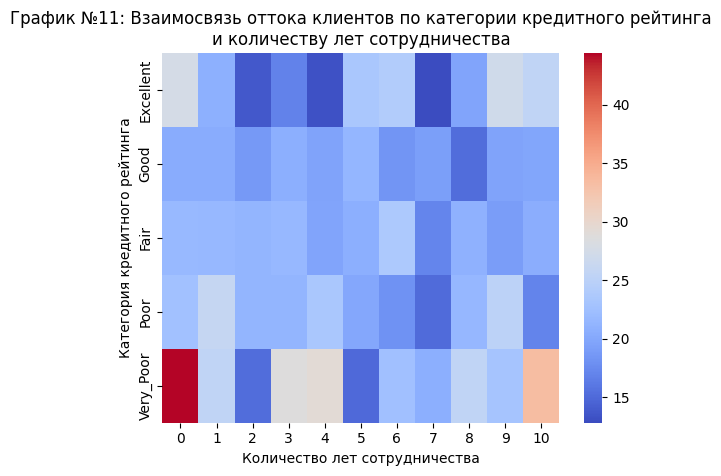

In [59]:
pivot_churn = churn.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
)
pivot_churn = pivot_churn.reindex(['Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor'])
pivot_churn=pivot_churn.apply(lambda x: round(x*100,1))

heatmap = sns.heatmap(data=pivot_churn, cmap='coolwarm')
heatmap.set_title('График №11: Взаимосвязь оттока клиентов по категории кредитного рейтинга\nи количеству лет сотрудничества')
heatmap.set_xlabel('Количество лет сотрудничества')
heatmap.set_ylabel('Категория кредитного рейтинга');

### График №11
#### Вывод:
* Отток клиентов наблюдается по всем категориям кредитного рейтинга и при любом количестве лет сотрудничества в диапазоне ≈ 20-25%.
* Категория 'Excellent' характерезуется более вариативными данными с пиковыми значениями оттока ≈ 30%. При этом в этой категории сосредоточено набольшее число лояльных клиентов.
* * 'Excellent' 2 года сотрудничества ≈ 15%.
* * 'Excellent' 3 года сотрудничества ≈ 17%.
* * 'Excellent' 4 года сотрудничества менее 15%.
* * 'Excellent' 7 года сотрудничества менее 15%.
* Категории 'Poor', 'Fair', 'Good' отличаются низкой вариативностью данных, отток впередлах ≈ 15-27%.
* Категория кредитного рейтинга 'Very_Poor' демонстрирует наименьшую лояльность по сравнению с другими. Критический отток наблюдается в этой группе.
* * 'Very_Poor' до 1 года сотрудничества уходят более 40% - самая нелояльная группа клиентов.
* * 'Very_Poor' 3 года сотрудничества ≈ 30%.
* * 'Very_Poor' 4 года сотрудничества ≈ 30%.
* * 'Very_Poor' 10 лет сотрудничества ≈ 35%.
#### Итог: 
* Банк теряет основную долю клиентов:
* * в первые 2 года сотрудничества
* * после 8 лет сотрудничества 
* Пик лояльности наблюдяется от 2 до 7 лет сотрудничества, за исключением клиентов с кредитным рейтингом 'Very_Poor'. Клиенты с этим рейтингом в целом менее лояльны остальных, в особености в первый год сотрудничества.
* Возможно, банку стоит пересмотреть условия обслуживания клиентов в первые годы сотрудничества, ввести дополнительную мотивацию для "старых" клиентов. Пересмотреть условия для клиентов с низким кредитным рейтингом.